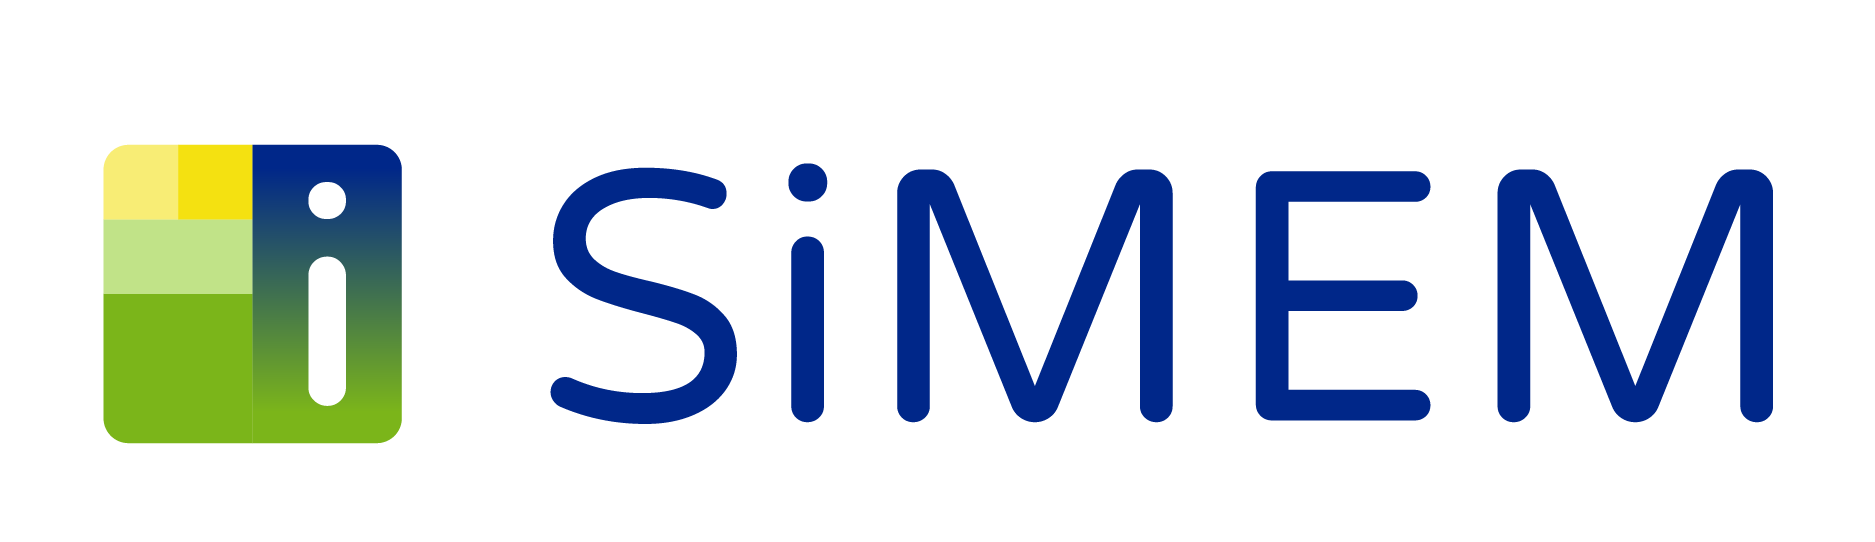

[SiMEM](https://www.simem.co/)

## Caso de uso - Cantidades y precios en contratos de energía del Mercado Mayorista para contratos del SICEP


# Objetivos de este Notebook

* Explicar cómo se realiza la instalación e importación de la librería pydataxm desde la consola para su uso en ambientes locales
* Explicar cómo se pueden consultar los conjuntos de datos a través de la librería Pydataxm
* Explicar cómo realizar el procesamiento y manipulación de los datos consultados
* Explicar el análisis de los datos consultados para dar respuesta al caso de uso propuesto

**Índice**

1. [Instalación de librerías](#section1)

2. [Importación de librerías](#section2)

3. [Consultar información de los conjuntos de datos](#section3)

4. [Manipulación de datos](#section4)

5. [Análisis para dar respuesta al caso de uso](#section5)


<a id='section1'></a>
# 1. Instalación de la librería
Ejecutar el siguiente comando en el CMD para instalar la librería de python.

In [ ]:
#!{sys.executable} -m pip install pydataxm

<a id='section2'></a>
# 2. Importación de librerías


In [17]:
from pydataxm.pydatasimem import ReadSIMEM  # Importa clases para interactuar con datos del sistema SIMEM
import pandas as pd                             # Librería para manipulación y análisis de datos en estructuras tipo DataFrame
import plotly.graph_objects as go               # Importa la biblioteca para crear gráficos
import asyncio                                  # Módulo para programación asíncrona en Python
from concurrent.futures import ThreadPoolExecutor # Importa el ejecutor de hilos para manejar tareas concurrentes
import nest_asyncio                             # Módulo para permitir anidamiento de bucles de eventos asíncronos
nest_asyncio.apply()                            # Aplica el parche para permitir anidamiento de bucles de eventos

pd.options.mode.chained_assignment = None       # Desactiva el warning

<a id='section3'></a>
# 3. Consultar información de los conjuntos de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Para este ejemplo el conjunto a presentar es  [Cantidades y precios en contratos de energía del Mercado Mayorista del SICEP para el mercado regulado](https://www.simem.co/datadetail/1E543E6E-8A4F-4F2B-9D94-D8C4F96715FE).

Se definen los parámetros de entrada y se crea el objeto ReadSIMEM() para realizar las consultas.

In [2]:
id_dataset_cantidades_agente = '1e543e'                     # ID del conjunto de datos a consultar
id_dataset_cantidades_sistema = '305a36'                    # ID del conjunto de datos a consultar
id_dataset_precios_agente = 'f0be2a'                        # ID del conjunto de datos a consultar
id_dataset_precios_sistema = 'cebe60'                       # ID del conjunto de datos a consultar

fecha_inicial_precios = '2022-01-01'                                # Fecha de inicio del rango de consulta
fecha_final_precios = '2024-12-31'                                  # Fecha de fin del rango de consulta
fecha_inicial_cantidades = '2024-12-01'                             # Fecha de inicio del rango de consulta
fecha_final_cantidades = '2024-12-31'                               # Fecha de fin del rango de consulta


df_cantidades_agente = ReadSIMEM(id_dataset_cantidades_agente, fecha_inicial_cantidades, fecha_final_cantidades).main()     # Instancia de la clase ReadSIMEM con los parámetros definidos
df_cantidades_sistema = ReadSIMEM(id_dataset_cantidades_sistema, fecha_inicial_cantidades, fecha_final_cantidades).main()   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_precios_agente = ReadSIMEM(id_dataset_precios_agente, fecha_inicial_precios, fecha_final_cantidades).main()           # Instancia de la clase ReadSIMEM con los parámetros definidos
df_precios_sistema = ReadSIMEM(id_dataset_precios_sistema, fecha_inicial_precios, fecha_final_cantidades).main()         # Instancia de la clase ReadSIMEM con los parámetros definidos

display(df_cantidades_agente.head(20))                      # Visualización de las primeras 20 filas de uno de los DataFrame


****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Energía promedio de los contratos del SICEP para el mercado regulado por comercializador"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0
Extraccion de registros: 3.391920804977417
End of data extracting process
****************************************************************************************************
****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Energía promedio de los contratos de convocatorias del SICEP con destino al mercado regulado del Sistema Interconectado Nacional"
****************************************************************************************************
Inicio consult

,Fecha,CodigoDuracion,CodigoAgenteComprador,TipoDespachoContrato,PrcjEnergiaCttosIntegradosV,PrcjEnergiaCttosDeterminables,EnergiaPromedioPorContrato,EnergiaDespachada,Version
0,2024-12-01,P1M,QIEC,Pague lo contratado,0.0,0.0,1296165.51,2592331.01,TXR
1,2024-12-01,P1M,ENIC,Pague lo contratado,0.0,0.0,1358019.00,1358019.00,TX5
2,2024-12-01,P1M,EXEC,Pague lo demandado,0.0,100.0,11823575.57,11823575.57,TXR
3,2024-12-01,P1M,NEUC,Pague lo contratado,0.0,0.0,3517237.78,10551713.35,TX5
4,2024-12-01,P1M,EMSC,Pague lo contratado,0.0,0.0,1023000.00,2046000.00,TX4
5,2024-12-01,P1M,CHCC,Pague lo contratado,0.0,0.0,9495556.84,37982227.37,TX5
6,2024-12-01,P1M,ESVC,Pague lo contratado,0.0,0.0,416067.62,416067.62,TX5
7,2024-12-01,P1M,TENC,Pague lo contratado,0.0,0.0,2790000.00,5580000.00,TXF
8,2024-12-01,P1M,ESOC,Pague lo demandado,0.0,100.0,464502.15,464502.15,TX4
9,2024-12-01,P1M,TENC,Pague lo contratado,0.0,0.0,2790000.00,5580000.00,TXR


Debido a la cantidad de datos del conjunto de datos de demanda una alternativa de consumo se presenta a continuacion

In [3]:
#dataset a consultar
id_dataset_demanda = 'b7917a'

#rango de fechas a consultar desagregadas de manera diaria
fechas = pd.date_range(fecha_inicial_cantidades, fecha_final_cantidades, freq='D').strftime('%Y-%m-%d').tolist()

#funcion a ejecutar de manera asincrona
def consulta_sync(fecha):
    return ReadSIMEM(id_dataset_demanda, fecha, fecha).main()

#definicion de funcion asincrona
async def consulta_asincrona():
    loop = asyncio.get_running_loop()
    with ThreadPoolExecutor() as pool:
        tasks = [loop.run_in_executor(pool, consulta_sync, fecha) for fecha in fechas]
        results = await asyncio.gather(*tasks)
    return pd.concat(results, ignore_index=True)

#ejecucion de funcion asincrona
df_demanda = asyncio.run(consulta_asincrona())

#filtro de datos de demanda
df_demanda_real_regulada = df_demanda[df_demanda['CodigoVariable']=='DdaRealRegulada'] 
df_perdidas_regulada = df_demanda[df_demanda['CodigoVariable']=='PerdidasDemandaRegulada']
df_demanda_real_no_regulada = df_demanda[df_demanda['CodigoVariable']=='DdaRealNoRegulada']
df_perdidas_no_regulada = df_demanda[df_demanda['CodigoVariable']=='PerdidasDemandaNoRegulada']

****************************************************************************************************
Initializing object
****************************************************************************************************
Initializing object
****************************************************************************************************
Initializing object
****************************************************************************************************
Initializing object
****************************************************************************************************
Initializing object
****************************************************************************************************
Initializing object
****************************************************************************************************
Initializing object
****************************************************************************************************
Initializing object
********************************

<a id='section4'></a>
# 4. Manipulación de datos
Los siguientes pasos corresponden a las actividades de manipulación y preparación de los datos que son relevantes para el análisis. 

### Filtrar la máxima versión para el periodo de consulta de los datos
El método filtra para el dataset de consulta, la máxima versión de la liquidación para cada uno de los días. 

In [15]:
def filtrar_ultima_version(df, columna_fecha, columna_version, columna_variable=None):                      # Función para filtrar la última versión de registros por mes y variables (opcional)
    versiones = ['TX1', 'TX2', 'TXR', 'TXF', 'TX3', 'TX4', 'TX5', 'TX6', 'TX7', 'TX8', 'TX9', 'TX10']        # Lista de versiones ordenadas por prioridad
    version_orden = pd.Series(range(1, len(versiones) + 1), index=versiones)                                # Serie que asigna un orden numérico a cada versión
    df[columna_fecha] = pd.to_datetime(df[columna_fecha])                                                   # Conversión de la columna de fecha a tipo datetime
    df['año_mes'] = df[columna_fecha].dt.to_period('M')                                                     # Se crea una columna con el año y mes del registro
    df['orden_version'] = df[columna_version].map(version_orden)                                            # Se asigna el orden de versión a cada fila

    if columna_variable is None:                                                                            # Si no se especifican variables adicionales
        df_filtrado = df.sort_values(['año_mes', 'orden_version'], ascending=[True, False])                 # Ordena por mes y versión descendente
        df_filtrado = df_filtrado.drop_duplicates(subset=[columna_fecha], keep='first')                     # Elimina duplicados conservando la última versión por fecha
    else:                                                                                                    # Si se especifican variables adicionales
        if isinstance(columna_variable, str):                                                               # Convierte a lista si es un solo string
            columna_variable = [columna_variable]
        orden_columnas = columna_variable + ['año_mes', 'orden_version']                                    # Define el orden de columnas para ordenar
        df_filtrado = df.sort_values(orden_columnas, ascending=[True]*len(columna_variable) + [True, False])# Ordena por variables, mes y versión
        df_filtrado = df_filtrado.drop_duplicates(subset=columna_variable + [columna_fecha], keep='first')  # Elimina duplicados por variables y fecha

    df_filtrado = df_filtrado.drop(columns=['año_mes', 'orden_version'])                                    # Elimina columnas auxiliares
    return df_filtrado                                                                                      # Retorna el DataFrame filtrado

#Filtros de version de precios y cantidades de contratos del SICEP
df_cantidades_agente = filtrar_ultima_version(df=df_cantidades_agente, columna_fecha='Fecha', columna_version='Version', columna_variable=['CodigoAgenteComprador'])     # Filtra la última versión de cantidades por agente
df_cantidades_sistema = filtrar_ultima_version(df=df_cantidades_sistema, columna_fecha='Fecha', columna_version='Version')   # Filtra la última versión de cantidades por sistema
df_precios_agente = filtrar_ultima_version(df=df_precios_agente, columna_fecha='Fecha', columna_version='Version', columna_variable=['CodigoAgenteComprador'])           # Filtra la última versión de precios por agente
df_precios_sistema = filtrar_ultima_version(df=df_precios_sistema, columna_fecha='Fecha', columna_version='Version')         # Filtra la última versión de precios por sistema

#Filtros de los datos de demanda y perdidas
df_demanda_real_regulada = filtrar_ultima_version(df=df_demanda_real_regulada, columna_fecha='FechaHora', columna_version='Version', columna_variable=['CodigoSICAgente'])              # Filtra la última versión de demanda real regulada
df_perdidas_regulada = filtrar_ultima_version(df=df_perdidas_regulada, columna_fecha='FechaHora', columna_version='Version', columna_variable=['CodigoSICAgente'])                          # Filtra la última versión de pérdidas reguladas
df_demanda_real_no_regulada = filtrar_ultima_version(df=df_demanda_real_no_regulada, columna_fecha='FechaHora', columna_version='Version', columna_variable=['CodigoSICAgente'])     # Filtra la última versión de demanda real no regulada
df_perdidas_no_regulada = filtrar_ultima_version(df=df_perdidas_no_regulada, columna_fecha='FechaHora', columna_version='Version', columna_variable=['CodigoSICAgente'])                 # Filtra la última versión de pérdidas no reguladas

Se agregan las cantidades de contratos del SICEP para posteriores analisis

In [5]:
#agregacion de datos de cantidades por agente en el preriodo consultado
df_cantidades_agente_agrupado = df_cantidades_agente.groupby(['CodigoAgenteComprador']).agg({'EnergiaDespachada': 'sum'}).round(2).reset_index()

#union de datos por agente con cantidades totales de contratos del SICEP en el periodo consultado
df_cantidades_agente_agrupado["EnergiaDespachadaSistema"] = df_cantidades_sistema.EnergiaDespachada.sum()

Se realizan las agregaciones de demanda para posteriores analisis

In [6]:
# se renombran las columnas con los correspondientes nombres de la variable
df_demanda_real_regulada.rename(columns={"Valor":"DemRealRegulada"}, inplace = True)
df_perdidas_regulada.rename(columns={"Valor":"PerRegulada"}, inplace = True)
df_demanda_real_no_regulada.rename(columns={"Valor":"DemRealNoRegulada"}, inplace = True)
df_perdidas_no_regulada.rename(columns={"Valor":"PerNoRegulada"}, inplace = True)

#union por fecha y agente de los dataframe con las demandas de interes
df_demanda_completa =  df_demanda_real_regulada.merge(df_perdidas_regulada, on=['FechaHora', 'CodigoSICAgente'], how='outer').reset_index()
df_demanda_completa = df_demanda_completa[['FechaHora', 'CodigoSICAgente', 'DemRealRegulada', "PerRegulada"]]

df_demanda_completa = df_demanda_completa.merge(df_demanda_real_no_regulada, on=['FechaHora', 'CodigoSICAgente'], how='outer').reset_index()
df_demanda_completa = df_demanda_completa[['FechaHora', 'CodigoSICAgente', 'DemRealRegulada', "PerRegulada", "DemRealNoRegulada"]]

df_demanda_completa = df_demanda_completa.merge(df_perdidas_no_regulada, on=['FechaHora', 'CodigoSICAgente'], how='outer').reset_index()
df_demanda_completa = df_demanda_completa[['FechaHora', 'CodigoSICAgente', 'DemRealRegulada', "PerRegulada", "DemRealNoRegulada", "PerNoRegulada"]]

#agregacion de los datos de demanda por agente para el periodo de interes
df_demanda_completa = df_demanda_completa.groupby(by=['CodigoSICAgente']).agg({'DemRealRegulada': 'sum', "PerRegulada": 'sum', "DemRealNoRegulada": 'sum', "PerNoRegulada": 'sum'}).reset_index()

#calculo de la demanda comercial del sistema, demanda comercial regulada y demanda comercial no regulada
df_demanda_completa["DemandaComercialRegulada"] = df_demanda_completa["DemRealRegulada"] + df_demanda_completa["PerRegulada"]
df_demanda_completa["DemandaComercialNoRegulada"] = df_demanda_completa["DemRealNoRegulada"] + df_demanda_completa["PerNoRegulada"]
df_demanda_completa["DemandaComercial"] = df_demanda_completa["DemandaComercialRegulada"] + df_demanda_completa["DemandaComercialRegulada"]

#filtro del datafreme de las columnas usadas en los analisis posteriores
df_demanda_completa = df_demanda_completa[['CodigoSICAgente' , "DemandaComercialRegulada", "DemandaComercialNoRegulada", "DemandaComercial"]]

Se unen los datos de demanda y cantidades de contratos

In [7]:
#union del dataframe de cantidades de contratos del SICEP y demanda
df_cantidades_agente_agrupado = df_cantidades_agente_agrupado.merge(df_demanda_completa, left_on='CodigoAgenteComprador', right_on='CodigoSICAgente', how='outer')

#filtro de columnas de interes
df_cantidades_agente_agrupado = df_cantidades_agente_agrupado[['CodigoAgenteComprador', 'EnergiaDespachada', 'EnergiaDespachadaSistema', 'DemandaComercialRegulada', 'DemandaComercialNoRegulada', 'DemandaComercial']]

#agregacion de columnas necesarios para los graficos presentados en la siguiente parte
df_cantidades_agente_agrupado["OtrosMecanismos"] = df_cantidades_agente_agrupado["DemandaComercialRegulada"] - df_cantidades_agente_agrupado["EnergiaDespachada"]
df_cantidades_agente_agrupado["DemandaComercialDestino"] = df_cantidades_agente_agrupado["DemandaComercialNoRegulada"]

#conversion de datos a GWh
df_cantidades_agente_agrupado[df_cantidades_agente_agrupado.select_dtypes(include='number').columns] = df_cantidades_agente_agrupado.select_dtypes(include='number') / 1e6


In [8]:
#ordenamiento de datos de precios por fecha
df_precios_sistema.sort_values(by=['Fecha'], ascending=[True], inplace=True) 

<a id='section5'></a>
# 5. Análisis para dar respuesta al caso de uso

Se crea funcion para graficar los valores de precios

In [9]:
def graficar_precios(df, titulo, color, nombre_variable, nombre_eje_x, nombre_eje_y, tipo_linea, titulo_y):

    fig = go.Figure()

    for variable in range(len(nombre_eje_y)):
    
        fig.add_trace(go.Scatter(
            x=df[nombre_eje_x],
            y=df[nombre_eje_y[variable]],
            mode='lines',
            name=nombre_variable[variable],
            line=dict(color=color[variable], width=2, dash=tipo_linea[variable])
        ))

    fig.update_layout(
        title=titulo,
        xaxis_title='Fecha',
        yaxis_title=titulo_y,
        legend=dict(x=0.1, y=-0.2, bordercolor="Black", borderwidth=1, orientation="h"),
        template='simple_white',
        xaxis=dict(showgrid=True, gridcolor='lightgray'),
        yaxis=dict(showgrid=True, gridcolor='lightgray'),
        width=1000,   # ancho en píxeles
        height=600    # alto en píxeles
    )

    fig.show()                                                                                



Se grafican los precios por sistema

In [10]:
graficar_precios(df=df_precios_sistema, titulo='Evolución mensual de los precios del SICEP<br>Periodo: {fecha_inicial} a {fecha_final}'.format(fecha_inicial=fecha_inicial_precios, fecha_final=fecha_final_precios), 
                 color=['blue', 'green', 'red', 'blue'],
                 nombre_variable=['Precio Mínimo', 'PPS', 'PPP', 'Precio Máximo'], 
                 nombre_eje_x='Fecha', 
                 nombre_eje_y=['PrecioMinimo', 'PPS', 'PPP', 'PrecioMaximo'], 
                 tipo_linea=['dot', 'solid', 'solid', 'dot'], 
                 titulo_y='Precios de contratos del SICEP'
                 )

Se agrupan y se filtran los valores de precios para conocer durente el preriodo de tiempo que agente tuvo compras en contratos mas alta, ordenando los valores por precio promedio ponderado

In [11]:
df_precios_agente.groupby(['CodigoAgenteComprador']).agg({'PPP': 'mean', 'PrecioMaximo': 'max'}).round(2).reset_index().sort_values(by=['PPP'], ascending=False).head(20)  # Agrupa por agente y calcula el precio promedio ponderado, ordenando de mayor a menor

,CodigoAgenteComprador,PPP,PrecioMaximo
12,EBPC,434.55,503.23
38,PEEC,400.47,427.74
9,CSIC,393.46,683.22
30,ESVC,374.14,381.92
0,BIAC,359.23,554.68
17,EGVC,342.32,364.89
24,ENIC,341.33,361.51
10,CSSC,341.04,748.60
39,QIEC,334.53,420.22
4,CEOC,333.17,430.83


Se crean filtros para graficar los precios del SICEP por agente

In [18]:
codigo_agente_comprador = 'EBPC'

comparar_sistema = True

titulo = 'Evolución mensual de los precios del SICEP del agente ' + codigo_agente_comprador + '<br>Periodo: {fecha_inicial} a {fecha_final}'.format(fecha_inicial=fecha_inicial_precios, fecha_final=fecha_final_precios)

df_precios_agente_filtrado = df_precios_agente[df_precios_agente['CodigoAgenteComprador']==codigo_agente_comprador] 

df_precios_agente_filtrado.sort_values(by=['Fecha'], ascending=[True], inplace=True) 

if comparar_sistema:
    df_precios_agente_filtrado = df_precios_agente_filtrado.merge(df_precios_sistema, on = 'Fecha', how='left', suffixes=('', '_Sistema'))  
    
    graficar_precios(df=df_precios_agente_filtrado, titulo=titulo, 
                    color=['blue', 'green', 'yellow', 'blue', 'red', 'red'],
                    nombre_variable=['Precio Mínimo', 'PPS', 'PPP', 'Precio Máximo', 'Precio Máximo Sistema', 'Precio mínimo Sistema'], 
                    nombre_eje_x='Fecha', 
                    nombre_eje_y=['PrecioMinimo', 'PPS', 'PPP', 'PrecioMaximo', 'PrecioMaximo_Sistema', 'PrecioMinimo_Sistema'], 
                    tipo_linea=['dot', 'solid', 'solid', 'dot', 'dot', 'dot'], 
                    titulo_y='Precios de contratos del SICEP'
                    )
else:
    graficar_precios(df=df_precios_agente_filtrado, titulo=titulo, 
                    color=['blue', 'green', 'red', 'blue'],
                    nombre_variable=['Precio Mínimo', 'PPS', 'PPP', 'Precio Máximo'], 
                    nombre_eje_x='Fecha', 
                    nombre_eje_y=['PrecioMinimo', 'PPS', 'PPP', 'PrecioMaximo'], 
                    tipo_linea=['dot', 'solid', 'solid', 'dot'], 
                    titulo_y='Precios de contratos del SICEP'
                    )

## Analisis de cantidades de contratos del SICEP 

In [13]:
df_cantidades_agente_agrupado.sort_values(by=["EnergiaDespachada"], inplace = True, ascending = False)


# Calcular el total de energía despachada
total_energia = df_cantidades_agente_agrupado['EnergiaDespachada'].sum()

# Crear etiquetas con porcentaje y valor total
labels = ['Sistema']
for idx, row in df_cantidades_agente_agrupado.iterrows():
    valor = row['EnergiaDespachada']
    porcentaje = valor / total_energia * 100
    etiqueta = f"{row['CodigoAgenteComprador']}\n{valor:.2f} GWh\n({porcentaje:.2f}%)"
    labels.append(etiqueta)



fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color='blue'
    ),
    link=dict(
        source=[0] * len(df_cantidades_agente_agrupado),
        target=list(range(1, len(df_cantidades_agente_agrupado) + 1)),
        value=df_cantidades_agente_agrupado['EnergiaDespachada'].tolist()
    )
)])

fig.update_layout(
    title=f"Energía Despachada por contratos del SICEP<br>Total Energia Despachada: {total_energia:.2f} GWh<br>Periodo: {fecha_inicial_cantidades} a {fecha_final_cantidades}",
    width=1100,
    height=1100,
    template='simple_white'
)

fig.show() 

Analisis de cantidades de contratos del SICEP por agente

In [14]:
# Sankey multinivel por agente comprador 
codigo = 'EPMC'  # Reemplaza por el código que deseas
filtro = df_cantidades_agente_agrupado['CodigoAgenteComprador'] == codigo
df_filtrado = df_cantidades_agente_agrupado[filtro].copy()

total_demanda_comercial = df_filtrado['DemandaComercial'].sum()
total_demanda_reg = df_filtrado['DemandaComercialRegulada'].sum()
total_demanda_noreg = df_filtrado['DemandaComercialNoRegulada'].sum()
total_otros_mecanismos = df_filtrado['OtrosMecanismos'].sum()
total_energia_despachada = df_filtrado['EnergiaDespachada'].sum()
total_demanda_comercial_destino = df_filtrado['DemandaComercialNoRegulada'].sum()  # igual a total_demanda_noreg

def label_valor_pct(nombre, valor, total):
    pct = (valor / total * 100) if total else 0
    return f"{nombre}\n{valor:.2f} GWh\n({pct:.1f}%)"

labels = [
    f"Demanda Comercial {codigo}\n{total_demanda_comercial:.2f} GWh\n(100.0%)",
    label_valor_pct("Demanda Regulada", total_demanda_reg, total_demanda_comercial),
    label_valor_pct("Demanda No Regulada", total_demanda_noreg, total_demanda_comercial),
    label_valor_pct("Otros Mecanismos", total_otros_mecanismos, total_demanda_reg),
    label_valor_pct("Contratos SICEP", total_energia_despachada, total_demanda_reg),
    label_valor_pct("Demanada No Regulada", total_demanda_comercial_destino, total_demanda_noreg)
]

source = []
target = []
value = []

# DemandaComercial → TotalDemandaReg y TotalDemandaNoReg
source += [0, 0]
target += [1, 2]
value += [total_demanda_reg, total_demanda_noreg]

# TotalDemandaReg → OtrosMecanismos y EnergiaDespachada
source += [1, 1]
target += [3, 4]
value += [total_otros_mecanismos, total_energia_despachada]

# TotalDemandaNoReg → DemandaComercialDestino
source.append(2)
target.append(5)
value.append(total_demanda_comercial_destino)

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color='blue'
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(
    title=f"Flujo de Demanda Comercial a Destino y Energía Despachada para {codigo}<br>Periodo: {fecha_inicial_cantidades} a {fecha_final_cantidades}",
    width=1100,
    height=600,
    template='simple_white'
)

fig.show()
